In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('TRAIN_CHURN.csv')
pd.set_option('display.max_columns',None)

In [24]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [25]:
# checking unique values from these two columns.
# turns out both have 'nan' type data

print(f"region category unique = {df['region_category'].unique()}")
print(f"offer types unique = {df['preferred_offer_types'].unique()}")

region category unique = ['Village' 'City' 'Town' nan]
offer types unique = ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]


In [26]:
# checking the proportion of 'nan' at 'Region Category' column

print(df.region_category.value_counts(normalize=True, dropna=False))

Town       0.381920
City       0.344318
NaN        0.146734
Village    0.127027
Name: region_category, dtype: float64


In [27]:
# checking the proportion of 'nan' at 'Region Category' column

print(df.preferred_offer_types.value_counts(normalize=True, dropna=False))

Gift Vouchers/Coupons       0.333829
Credit/Debit Card Offers    0.331801
Without Offers              0.326584
NaN                         0.007785
Name: preferred_offer_types, dtype: float64


In [28]:
# checking all-over data
# turns out dataset's row is imbalanced, not just two of the above.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [29]:
# checking the dependent variable (Y) values
# is there any -1 rating?

df['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [30]:
# decided to drop -1 value because (assumed) it's not valid

df = df[df['churn_risk_score'] != -1]

df['churn_risk_score'].value_counts()

3    10424
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

In [31]:
# replacing null or nan data with the majority (I checked already)

df['region_category'].replace({np.NaN:'Town'},inplace=True)
df['preferred_offer_types'].replace({np.NaN:'Gift Vouchers/Coupons'},inplace=True)

In [32]:
# checking any null or nan data

df.isna().any()

customer_id                     False
Name                            False
age                             False
gender                          False
security_no                     False
region_category                 False
membership_category             False
joining_date                    False
joined_through_referral         False
referral_id                     False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
last_visit_time                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                 True
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
dtype: bool

In [33]:
# dataset's row is balanced now (except 'points_in_wallet', we'll get down to it later)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   35829 non-null  object 
 1   Name                          35829 non-null  object 
 2   age                           35829 non-null  int64  
 3   gender                        35829 non-null  object 
 4   security_no                   35829 non-null  object 
 5   region_category               35829 non-null  object 
 6   membership_category           35829 non-null  object 
 7   joining_date                  35829 non-null  object 
 8   joined_through_referral       35829 non-null  object 
 9   referral_id                   35829 non-null  object 
 10  preferred_offer_types         35829 non-null  object 
 11  medium_of_operation           35829 non-null  object 
 12  internet_option               35829 non-null  object 
 13  l

**DATA PRE-PROCESSING**

Gender Column

In [34]:
# one-hot-encoding this column because the data type is categorical

pd.get_dummies(df, columns=['gender'], prefix='', prefix_sep='').head()

,customer_id,Name,age,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,F,M,Unknown
0,fffe4300490044003600300030003800,Pattie Morrisey,18,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,1,0,0
1,fffe43004900440032003100300035003700,Traci Peery,32,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,1,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,1,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,0,1,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,1,0,0


In [35]:
# turns out there are 'unknown' data

df['gender'].value_counts(normalize=True)

F          0.499372
M          0.499065
Unknown    0.001563
Name: gender, dtype: float64

In [36]:
# replacing the 'unknown' data with the majority data

df['gender'].replace({'Unknown':'F'},inplace=True)
df.loc[df['gender'] == 'Unknown']
df['gender'].value_counts()

F    17948
M    17881
Name: gender, dtype: int64

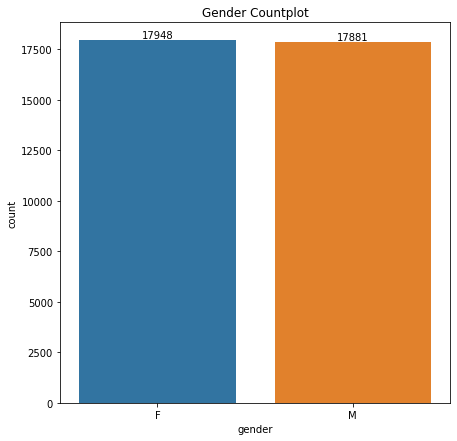

In [37]:
# make data visualization using countplot
# majority of the user is female

fig,ax1 = plt.subplots(figsize = (7,7))
graph = sns.countplot(ax = ax1 ,x = 'gender', data = df)
graph.set_xticklabels(graph.get_xticklabels())
plt.title('Gender Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['gender'].value_counts()[i], ha ="center", va = 'bottom')
    i += 1

plt.show()

Age Column

In [38]:
# categorize age into two category
# 16 - 21 = teen
# above that = adult
# and checking the missing value

teen = []
adult = []

for i in df['age']:
    if i >= 16 and i <= 21:
        teen.append(i)
    else:
        adult.append(i)
        if i == np.NaN:
            print('missing value detected')

print(f"jumlah teen = {len(teen)}")
print(f"jumlah adult = {len(adult)}")
print(f"total = {len(adult)+len(teen)}, no missing value")

jumlah teen = 3877
jumlah adult = 31952
total = 35829, no missing value


In [39]:
# make two dataframes consist of 'teen' and 'adult' data
# concating the two dataframes by columns

df_teen = pd.DataFrame(teen, columns = ['teen'])
df_adult = pd.DataFrame(adult, columns = ['adult'])

df_age = pd.concat([df_teen,df_adult], axis = 1)

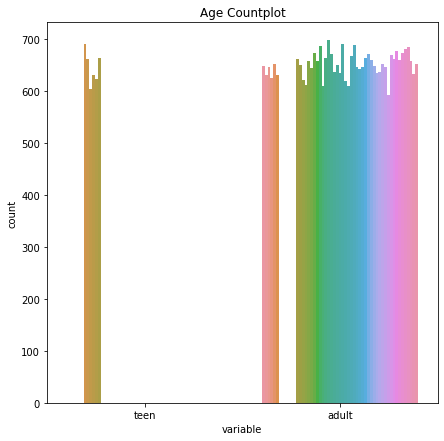

In [40]:
# make data visualization using countplot
# majority of the user is adult

fig,ax2 = plt.subplots(figsize = (7,7))
graph = sns.countplot(x = "variable", hue = "value", data = pd.melt(df_age));

ax2.get_legend().remove()
plt.title('Age Countplot');
plt.show()

Region Category Column

In [41]:
# checking the data if it's clean

df['region_category'].value_counts()

Town       18965
City       12315
Village     4549
Name: region_category, dtype: int64

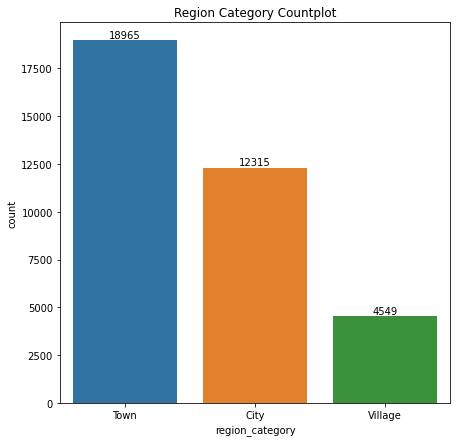

In [42]:
# make data visualization using countplot
# majority of the user's region is town - city - village

fig, ax3 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax3, x = 'region_category', order = df['region_category'].value_counts().index);
plt.title('Region Category Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['region_category'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Membership Category Column

In [43]:
# checking if the data is clean

df['membership_category'].value_counts()

Basic Membership       7473
No Membership          7466
Gold Membership        6574
Silver Membership      5806
Premium Membership     4308
Platinum Membership    4202
Name: membership_category, dtype: int64

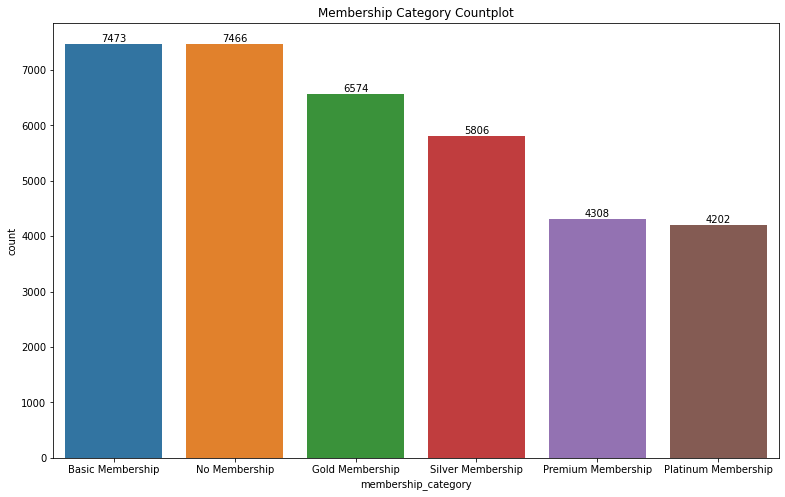

In [44]:
# data visualization using countplot
# the majority membership of the user is basic - no - gold - silver - premium - platinum

fig, ax4 = plt.subplots(figsize = (13,8))
graph = sns.countplot(data = df, ax = ax4, x = 'membership_category', order = df['membership_category'].value_counts().index);
plt.title('Membership Category Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['membership_category'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Joined Through Referral Column

In [45]:
# checking the value of this column
# turns out it has '?' data

df['joined_through_referral'].value_counts()

No     15354
Yes    15183
?       5292
Name: joined_through_referral, dtype: int64

In [46]:
# replacing '?' with majority data

df['joined_through_referral'].replace({'?':'No'},inplace = True)
df['joined_through_referral'].value_counts()

No     20646
Yes    15183
Name: joined_through_referral, dtype: int64

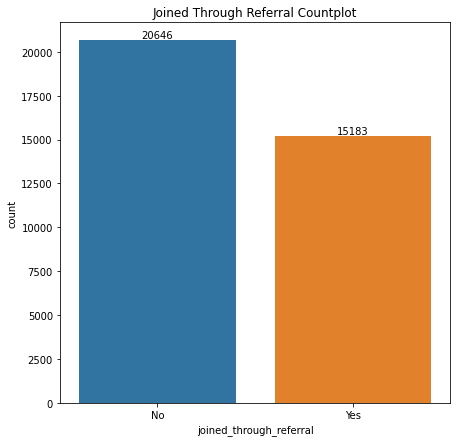

In [47]:
# data visualizing using countplot
# majority of the user didn't join through referral

fig, ax5 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax5, x = 'joined_through_referral', order = df['joined_through_referral'].value_counts().index);
plt.title('Joined Through Referral Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2, height + 0.1, df['joined_through_referral'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Preffered Offer Types Column

In [48]:
# checking the data if it's clean

df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12253
Credit/Debit Card Offers    11860
Without Offers              11716
Name: preferred_offer_types, dtype: int64

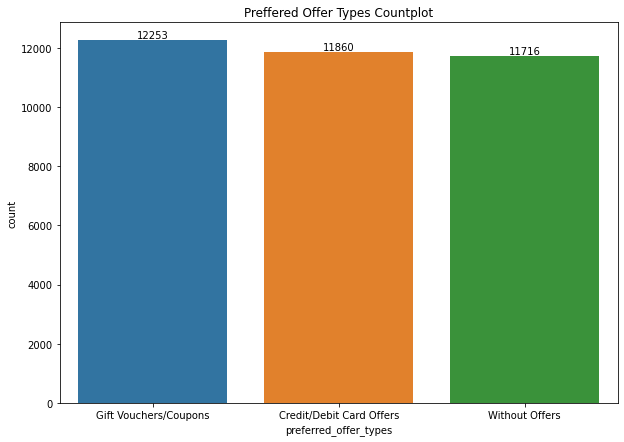

In [49]:
# data visualizing using countplot
# majority of the user prefer using gift vouchers / coupons

fig, ax6 = plt.subplots(figsize = (10,7))
graph = sns.countplot(data = df, ax = ax6, x = 'preferred_offer_types', order = df['preferred_offer_types'].value_counts().index);
plt.title('Preffered Offer Types Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['preferred_offer_types'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Medium of Operation Column

In [50]:
# checking the data if it's clean
# turns out it has '?' data

df['medium_of_operation'].value_counts()

Desktop       13476
Smartphone    13444
?              5230
Both           3679
Name: medium_of_operation, dtype: int64

In [51]:
# replacing the '?' data with the majority data

df['medium_of_operation'].replace({'?':'Smartphone'},inplace=True)
df['medium_of_operation'].value_counts()

Smartphone    18674
Desktop       13476
Both           3679
Name: medium_of_operation, dtype: int64

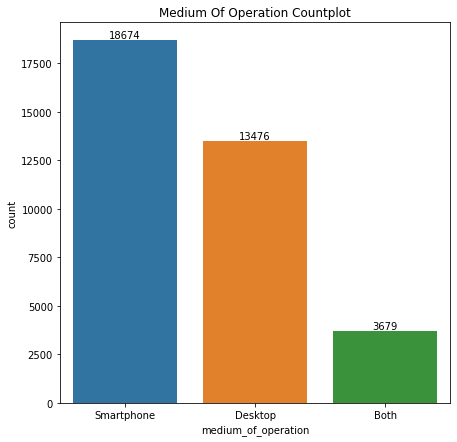

In [52]:
# data visualizing using countplot
# majority of the user uses smartphone as the medium of operation

fig, ax7 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax7, x = 'medium_of_operation', order = df['medium_of_operation'].value_counts().index);
plt.title('Medium Of Operation Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1, df['medium_of_operation'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Internet Option Column

In [53]:
# checking the data if it's clean

df['internet_option'].value_counts()

Wi-Fi          12016
Mobile_Data    11953
Fiber_Optic    11860
Name: internet_option, dtype: int64

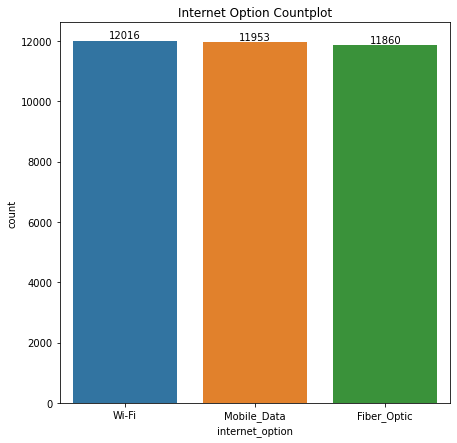

In [54]:
# visualizing data using counplot
# majority of the user uses mobile data - wifi - fiber optic as an internet option

fig, ax8 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax8, x = 'internet_option', order = df['internet_option'].value_counts().index);
plt.title('Internet Option Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['internet_option'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Day Since Last Login Column

In [55]:
# checking any negative, inf, null, and zero data

print((df[['days_since_last_login']] <= 0).any())
print((df[['days_since_last_login']] == np.inf).any())
print((df[['days_since_last_login']] == -np.inf).any())
print((df[['days_since_last_login']] == np.nan).any())

days_since_last_login    True
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool


In [56]:
# replacing the negative data with median
# using log to re-fix the data distribution

df['days_since_last_login'] = np.where(df['days_since_last_login'] 
                                < 0,0,df['days_since_last_login'])

med = df['days_since_last_login'].median()

df['days_since_last_login'] = np.where(df['days_since_last_login'] 
                                <= 0,med,df['days_since_last_login'])

#df['days_since_last_login'] = np.log(df['days_since_last_login'])

In [57]:
# re-check any negative, inf, null, and zero data

print((df[['days_since_last_login']] <= 0).any())
print((df[['days_since_last_login']] == np.inf).any())
print((df[['days_since_last_login']] == -np.inf).any())
print((df[['days_since_last_login']] == np.nan).any())

days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool
days_since_last_login    False
dtype: bool


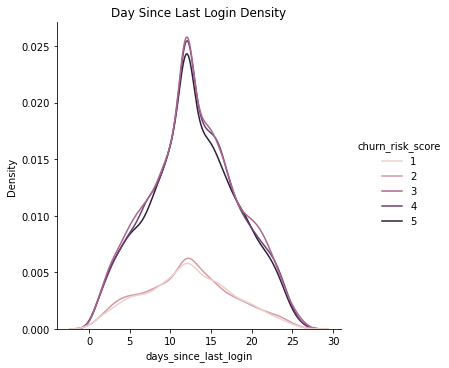

In [58]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='days_since_last_login', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Day Since Last Login Density');

Avg Time Spent Column

In [59]:
# checking any negative, inf, null, and zero data

print((df[['avg_time_spent']] <= 0).any())
print((df[['avg_time_spent']] == np.inf).any())
print((df[['avg_time_spent']] == -np.inf).any())
print((df[['avg_time_spent']] == np.nan).any())

avg_time_spent    True
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool


In [60]:
# replacing the negative data with median

df['avg_time_spent'] = np.where(df['avg_time_spent'] 
                        < 0,0,df['avg_time_spent'])

med2 = df['avg_time_spent'].median()

df['avg_time_spent'] = np.where(df['avg_time_spent'] 
                        <= 0,med2,df['avg_time_spent'])

In [61]:
# re-check any negative, inf, null, and zero data

print((df[['avg_time_spent']] <= 0).any())
print((df[['avg_time_spent']] == np.inf).any())
print((df[['avg_time_spent']] == -np.inf).any())
print((df[['avg_time_spent']] == np.nan).any())

avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool
avg_time_spent    False
dtype: bool


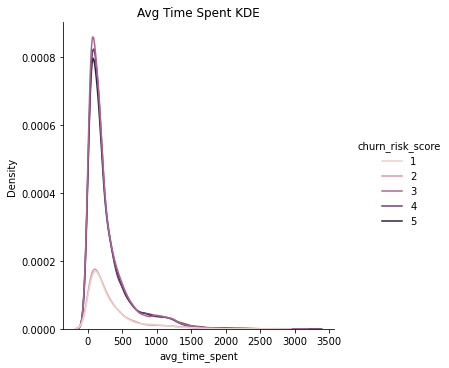

In [62]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_time_spent', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Time Spent KDE');

Avg Transaction Value Column

In [63]:
# checking any negative, inf, null, and zero data

print((df[['avg_transaction_value']] <= 0).any())
print((df[['avg_transaction_value']] == np.inf).any())
print((df[['avg_transaction_value']] == -np.inf).any())
print((df[['avg_transaction_value']] == np.nan).any())

avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool
avg_transaction_value    False
dtype: bool


In [64]:
# using log to re-fix the data distribution

df['avg_transaction_value'] = np.log(df['avg_transaction_value'])

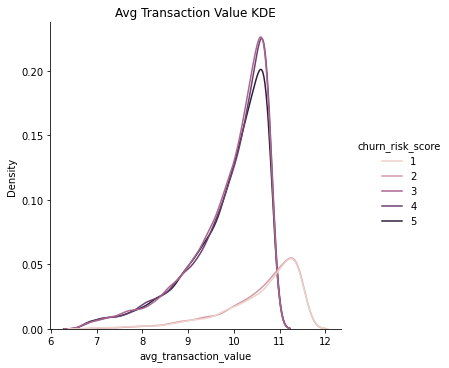

In [65]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_transaction_value', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Transaction Value KDE');

Avg Frequency Login Days Column

In [66]:
# checking the value of the column
# turns out there are 'Error' data

df['avg_frequency_login_days'].value_counts()

Error                  3419
13.0                   1361
8.0                    1326
19.0                   1319
14.0                   1315
                       ... 
20.608633458166725        1
55.37627229006624         1
1.9621975011295305        1
-14.864495588583964       1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 1587, dtype: int64

In [67]:
# replacing 'Error' data with zero
# then, casting the column's data type into numeric

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] == 'Error', 
                                 0,df['avg_frequency_login_days'])

df['avg_frequency_login_days'] = pd.to_numeric(df["avg_frequency_login_days"])

In [68]:
# checking any negative, inf, null, and zero data

print((df[['avg_frequency_login_days']] <= 0).any())
print((df[['avg_frequency_login_days']] == np.inf).any())
print((df[['avg_frequency_login_days']] == -np.inf).any())
print((df[['avg_frequency_login_days']] == np.nan).any())

avg_frequency_login_days    True
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool


In [69]:
# replacing negative data with zero
# replacing zero with median
# using log to re-fix the data distribution

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] <= 0, 
                                 0,df['avg_frequency_login_days'])
                                 
median0 = df['avg_frequency_login_days'].median()

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] <= 0, 
                                 median0,df['avg_frequency_login_days'])

df['avg_frequency_login_days'] = np.log(df['avg_frequency_login_days'])

df['avg_frequency_login_days'] = np.where(df['avg_frequency_login_days'] <= 0, 
                                 median0,df['avg_frequency_login_days'])

In [70]:
# re-check any negative, inf, null, and zero data

print((df[['avg_frequency_login_days']] <= 0).any())
print((df[['avg_frequency_login_days']] == np.inf).any())
print((df[['avg_frequency_login_days']] == -np.inf).any())
print((df[['avg_frequency_login_days']] == np.nan).any())

avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool
avg_frequency_login_days    False
dtype: bool


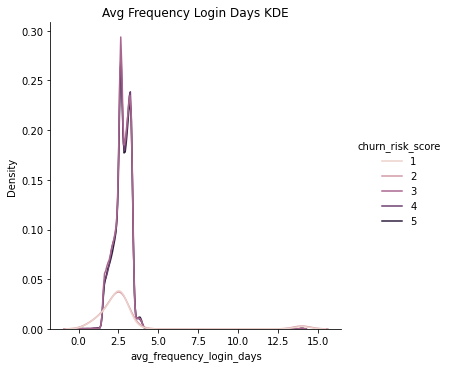

In [71]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='avg_frequency_login_days', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Avg Frequency Login Days KDE');

Points in Wallet Column

In [72]:
# checking any negative, inf, null, and zero data

print((df[['points_in_wallet']] <= 0).any())
print((df[['points_in_wallet']] == np.inf).any())
print((df[['points_in_wallet']] == -np.inf).any())
print((df[['points_in_wallet']] == np.nan).any())

points_in_wallet    True
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool


In [73]:
df['points_in_wallet'] = np.where(df['points_in_wallet'] < 0 
                         ,0,df['points_in_wallet'])

median = df['points_in_wallet'].median()

df['points_in_wallet'] = df['points_in_wallet'].replace({np.NaN : median})
df['points_in_wallet'] = df['points_in_wallet'].replace({np.inf : median})
df['points_in_wallet'] = df['points_in_wallet'].replace({-np.inf : median})
df['points_in_wallet'] = df['points_in_wallet'].replace({0.0 : median})

In [74]:
df[['points_in_wallet']]

,points_in_wallet
0,781.750000
1,697.820000
2,500.690000
3,567.660000
4,663.060000
...,...
36987,639.510000
36988,527.990000
36989,680.470000
36990,197.264414


In [75]:
# re-check any negative, inf, null, and zero data

print((df[['points_in_wallet']] <= 0).any())
print((df[['points_in_wallet']] == np.inf).any())
print((df[['points_in_wallet']] == -np.inf).any())
print((df[['points_in_wallet']] == np.nan).any())

points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool
points_in_wallet    False
dtype: bool


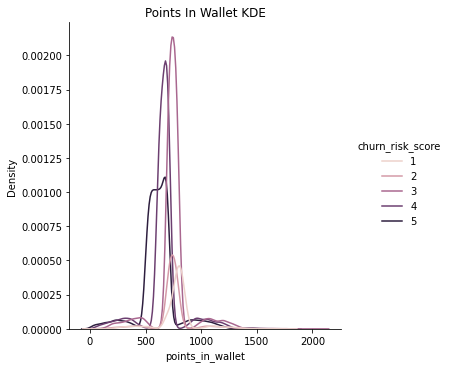

In [76]:
# visualizing data using density plot, using hue of 'churn_risk_score'

sns.displot(x='points_in_wallet', data=df, kind='kde', height=5, hue='churn_risk_score');
plt.title('Points In Wallet KDE');

Used Special Discount Column

In [77]:
# checking the value of this column

df['used_special_discount'].value_counts()

Yes    19718
No     16111
Name: used_special_discount, dtype: int64

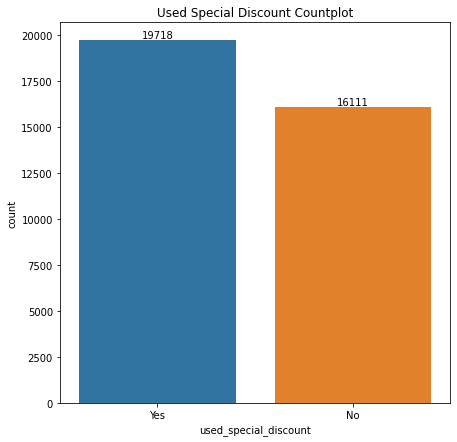

In [78]:
# visualising data using count plot
# majority of the user used special discount

fig, ax9 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax9, x = 'used_special_discount', order = df['used_special_discount'].value_counts().index);
plt.title('Used Special Discount Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['used_special_discount'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Offer Application Preference Column

In [79]:
df['offer_application_preference'].value_counts()

Yes    19783
No     16046
Name: offer_application_preference, dtype: int64

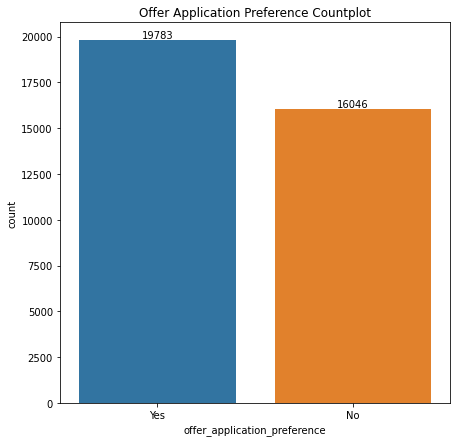

In [80]:
# visualizing data using count plot
# majority of the user prefer the application offer

fig, ax10 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax10, x = 'offer_application_preference', order = df['offer_application_preference'].value_counts().index);
plt.title('Offer Application Preference Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['offer_application_preference'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Past Complaint Column

In [81]:
# checking the value of this column

df['past_complaint'].value_counts()

No     18007
Yes    17822
Name: past_complaint, dtype: int64

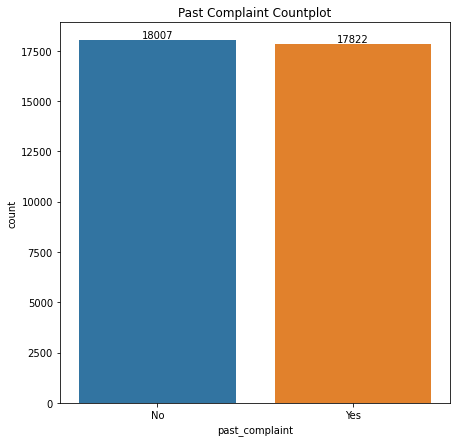

In [82]:
# visualizing the data using count plot
# majority of the user did not complaint in the past

fig, ax11 = plt.subplots(figsize = (7,7))
graph = sns.countplot(data = df, ax = ax11, x = 'past_complaint', order = df['past_complaint'].value_counts().index);
plt.title('Past Complaint Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['past_complaint'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Complaint Status Column

In [83]:
# checking the value of this columns

df['complaint_status'].value_counts()

Not Applicable              18007
Unsolved                     4501
Solved                       4467
Solved in Follow-up          4443
No Information Available     4411
Name: complaint_status, dtype: int64

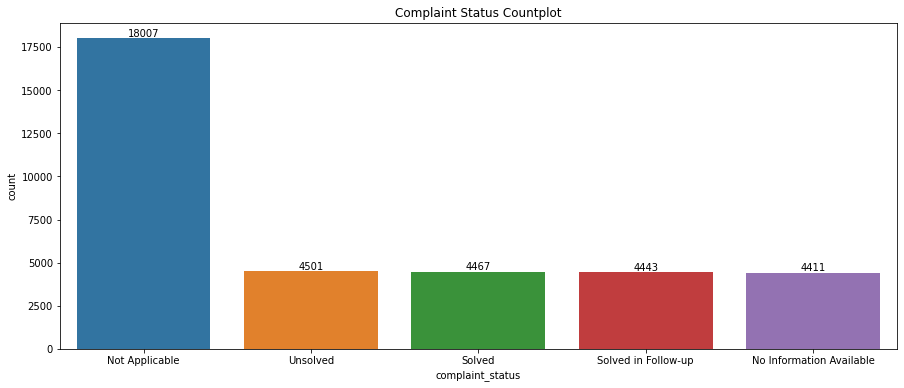

In [84]:
# visualizing the data using count plot
# majority of the complaint status is not applicable

fig, ax12 = plt.subplots(figsize = (15,6))
graph = sns.countplot(data = df, ax = ax12, x = 'complaint_status', order= df['complaint_status'].value_counts().index);
plt.title('Complaint Status Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['complaint_status'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

plt.show()

Feedback Column

In [85]:
# checking the value of this column

df['feedback'].value_counts()

Poor Product Quality        6152
Too many ads                6096
No reason specified         6072
Poor Website                6060
Poor Customer Service       6056
Reasonable Price            1382
User Friendly Website       1346
Products always in Stock    1345
Quality Customer Care       1320
Name: feedback, dtype: int64

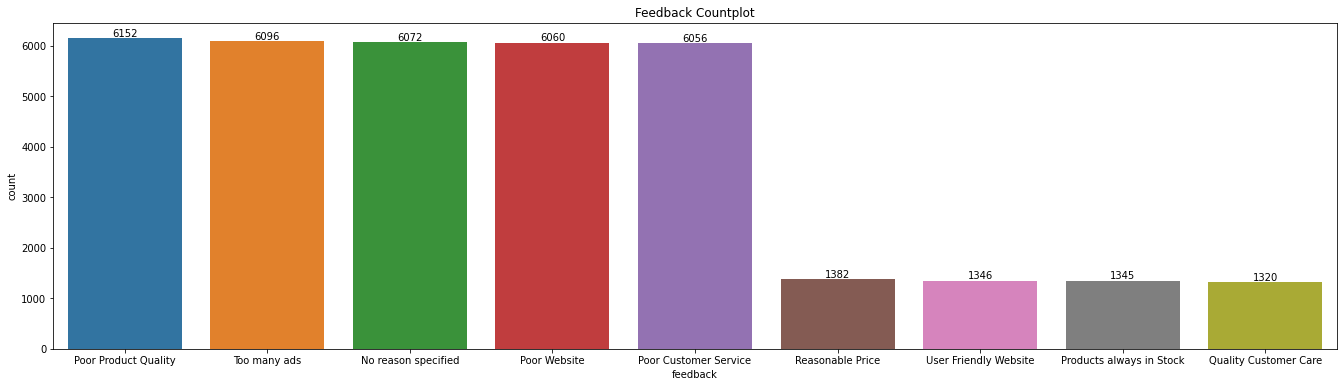

In [86]:
# visualizing data using count plot
# as you can see, there are several majority data

fig, ax13 = plt.subplots(figsize = (23,6))
graph = sns.countplot(data = df, ax = ax13, x = 'feedback', order= df['feedback'].value_counts().index);
plt.title('Feedback Countplot')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.1, df['feedback'].value_counts()[i], ha = "center", va = 'bottom')
    i += 1

**NUMERICAL CORRELATION CHECKING**

In [87]:
corr = df.corr()
pd.DataFrame(corr.iloc[:, 6])

,churn_risk_score
age,0.002400
days_since_last_login,0.029835
avg_time_spent,-0.027396
avg_transaction_value,-0.218172
avg_frequency_login_days,-0.006902
points_in_wallet,-0.318110
churn_risk_score,1.000000


**DATA CASTING**

In [88]:
# why now you might ask?

# that's because to improve your coding skills, get used to your keyboard
# and practice your eyes. As a beginner, this really helps me

df = df.drop(['Name','customer_id','security_no','joining_date',
        'referral_id','last_visit_time','age'], axis=1)

In [89]:
# one hot encoding (categorical) and data casting (numerical)

df = pd.get_dummies(df, columns=['gender','region_category','membership_category',
                            'joined_through_referral','preferred_offer_types',
                            'medium_of_operation','internet_option','used_special_discount',
                            'offer_application_preference','past_complaint',
                            'complaint_status','feedback'], prefix='', prefix_sep='')


df['days_since_last_login'] = df['days_since_last_login'].astype(np.int64)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(np.int64)
df['avg_time_spent'] = df['avg_time_spent'].astype(np.int64)
df['avg_transaction_value'] = df['avg_transaction_value'].astype(np.int64)
df['points_in_wallet'] = df['points_in_wallet'].astype(np.int64)
df['churn_risk_score'] = df['churn_risk_score'].astype(np.int64)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   days_since_last_login     35829 non-null  int64
 1   avg_time_spent            35829 non-null  int64
 2   avg_transaction_value     35829 non-null  int64
 3   avg_frequency_login_days  35829 non-null  int64
 4   points_in_wallet          35829 non-null  int64
 5   churn_risk_score          35829 non-null  int64
 6   F                         35829 non-null  uint8
 7   M                         35829 non-null  uint8
 8   City                      35829 non-null  uint8
 9   Town                      35829 non-null  uint8
 10  Village                   35829 non-null  uint8
 11  Basic Membership          35829 non-null  uint8
 12  Gold Membership           35829 non-null  uint8
 13  No Membership             35829 non-null  uint8
 14  Platinum Membership       35829 non-nu

**MODELLING**

In [91]:
# label encoding
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, df.columns != 'churn_risk_score'].values
y = df.iloc[:, df.columns == 'churn_risk_score'].values

le = LabelEncoder()
y = le.fit_transform(y)

In [92]:
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scale_X = StandardScaler()

X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)   

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of KNN model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred)}")

Accuracy of KNN model is 61.43 %

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       680
           1       0.57      0.56      0.56       668
           2       0.73      0.77      0.75      2634
           3       0.43      0.38      0.41      2500
           4       0.67      0.71      0.69      2476

    accuracy                           0.61      8958
   macro avg       0.59      0.60      0.60      8958
weighted avg       0.61      0.61      0.61      8958

[[ 394  286    0    0    0]
 [ 296  372    0    0    0]
 [   0    0 2020  588   26]
 [   1    0  689  958  852]
 [   0    0   56  661 1759]]

MEA: 0.3950658629158294


In [94]:
"""
k_range = range(1, 50)
k_scores = []
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
"""

'\nk_range = range(1, 50)\nk_scores = []\nscores = {}\nscores_list = []\n\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    y_pred = knn.predict(X_test)\n    scores[k] = metrics.accuracy_score(y_test, y_pred)\n    scores_list.append(metrics.accuracy_score(y_test, y_pred))\n'

In [95]:
"""
plt.figure(figsize = (10, 6))
plt.plot(k_range, scores_list)
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()
"""

"\nplt.figure(figsize = (10, 6))\nplt.plot(k_range, scores_list)\nplt.grid()\nplt.xlabel('Value of K')\nplt.ylabel('Accuracy')\nplt.show()\n"

In [96]:
knn = KNeighborsClassifier(n_neighbors=49) 

knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)

print('Accuracy of KNN model with the best K value is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred2)}")

Accuracy of KNN model with the best K value is 65.96 %

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       680
           1       0.62      0.51      0.56       668
           2       0.79      0.74      0.76      2634
           3       0.49      0.32      0.39      2500
           4       0.67      0.95      0.78      2476

    accuracy                           0.66      8958
   macro avg       0.63      0.64      0.63      8958
weighted avg       0.65      0.66      0.64      8958

[[ 478  202    0    0    0]
 [ 328  340    0    0    0]
 [   0    0 1945  689    0]
 [   0    2  529  803 1166]
 [   0    2    0  131 2343]]

MEA: 0.3410359455235544


Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 

clf = RandomForestClassifier(n_estimators = 150, random_state = 0) 
 
clf.fit(X_train, y_train)
 
y_pred3 = clf.predict(X_test)
pred = pd.DataFrame(y_pred3, columns=['predict'])

accuracy = metrics.accuracy_score(y_test,y_pred3)

print("Accuracy of Random Forest Model is: ", "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred3))

cm = confusion_matrix(y_test, y_pred3)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred3)}")
print()

Accuracy of Random Forest Model is:  78.20 %

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       680
           1       0.76      0.74      0.75       668
           2       0.90      0.93      0.91      2634
           3       0.74      0.54      0.63      2500
           4       0.72      0.88      0.79      2476

    accuracy                           0.78      8958
   macro avg       0.77      0.77      0.77      8958
weighted avg       0.78      0.78      0.78      8958

[[ 523  157    0    0    0]
 [ 177  491    0    0    0]
 [   0    0 2451  183    0]
 [   0    0  282 1359  859]
 [   0    0    0  295 2181]]

MEA: 0.21801741460147353



Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

logreg = LogisticRegression(random_state = 0)
result = logreg.fit(X_train, y_train)

y_pred4 = logreg.predict(X_test)
pred = pd.DataFrame(y_pred4, columns=['predict'])

accuracy = accuracy_score(y_test, y_pred4)
print('Accuracy of Logistic Regression model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred4))

cm = confusion_matrix(y_test, y_pred4)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred4)}")
print()

Accuracy of Logistic Regression model is 73.71 %

              precision    recall  f1-score   support

           0       0.59      0.88      0.71       680
           1       0.76      0.39      0.51       668
           2       0.89      0.88      0.88      2634
           3       0.72      0.41      0.53      2500
           4       0.67      0.97      0.79      2476

    accuracy                           0.74      8958
   macro avg       0.73      0.71      0.68      8958
weighted avg       0.75      0.74      0.72      8958

[[ 600   80    0    0    0]
 [ 410  258    0    0    0]
 [   0    0 2321  313    0]
 [   0    0  298 1034 1168]
 [   0    0    0   86 2390]]

MEA: 0.26289350301406567



SVM

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

model1 = SVC(kernel = 'linear', random_state = 0)
clf = model1.fit(X_train, y_train)

y_pred5 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print('Accuracy of SVM (Linear Kernel) model is', "{:.2f}".format(accuracy * 100),'%')
print()

cm = confusion_matrix(y_test, y_pred5)
print(cm)
print()

print(classification_report(y_test, y_pred5))

print(f"MEA: {mean_absolute_error(y_test, y_pred5)}")
print()

Accuracy of SVM (Linear Kernel) model is 75.20 %

[[ 680    0    0    0    0]
 [ 489  179    0    0    0]
 [   0    0 2437  197    0]
 [   0    0  288  964 1248]
 [   0    0    0    0 2476]]

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       680
           1       1.00      0.27      0.42       668
           2       0.89      0.93      0.91      2634
           3       0.83      0.39      0.53      2500
           4       0.66      1.00      0.80      2476

    accuracy                           0.75      8958
   macro avg       0.79      0.72      0.68      8958
weighted avg       0.80      0.75      0.72      8958

MEA: 0.24804643893726278



In [100]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

model = SVC(kernel = 'rbf', random_state = 0)
clf = model.fit(X_train, y_train)

y_pred6 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred6)
print('Accuracy of SVM (Gaussian Kernel) model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred6))

cm = confusion_matrix(y_test, y_pred6)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred6)}")
print()

Accuracy of SVM (Gaussian Kernel) model is 69.61 %

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       680
           1       0.67      0.47      0.55       668
           2       0.81      0.83      0.82      2634
           3       0.62      0.30      0.40      2500
           4       0.66      1.00      0.80      2476

    accuracy                           0.70      8958
   macro avg       0.67      0.67      0.65      8958
weighted avg       0.69      0.70      0.67      8958

[[ 528  152    0    0    0]
 [ 354  314    0    0    0]
 [   0    0 2174  460    0]
 [   0    1  504  749 1246]
 [   0    1    0    4 2471]]

MEA: 0.30419736548336684



XGBOOST

In [101]:
import xgboost 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

modelXGB = XGBClassifier(booster = 'gbtree', eval_metric = 'merror')
modelXGB.fit(X_train, y_train)

y_pred7 = modelXGB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred7)
print('Accuracy of XGBoost model is', "{:.2f}".format(accuracy * 100),'%')
print()

print(classification_report(y_test, y_pred7))

cm = confusion_matrix(y_test, y_pred7)
print(cm)
print()

print(f"MEA: {mean_absolute_error(y_test, y_pred7)}")
print()

Accuracy of XGBoost model is 77.81 %

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       680
           1       0.74      0.69      0.72       668
           2       0.91      0.92      0.92      2634
           3       0.71      0.60      0.65      2500
           4       0.73      0.84      0.78      2476

    accuracy                           0.78      8958
   macro avg       0.76      0.76      0.76      8958
weighted avg       0.78      0.78      0.78      8958

[[ 522  158    0    0    0]
 [ 207  461    0    0    0]
 [   0    0 2417  217    0]
 [   0    0  225 1501  774]
 [   0    0    0  407 2069]]

MEA: 0.22192453672694798



In [114]:
# checking any error and invalid data

print(f"< 0 value : {(df < 0).any().sum()}")
print(f"inf value : {(df == np.inf).any().sum()}")
print(f"-inf value : {(df == -np.inf).any().sum()}")
print(f"NaN value : {(df == np.NaN).any().sum()}")
print(f"negative value : {(df == np.negative).any().sum()}")

< 0 value : 0
inf value : 0
-inf value : 0
NaN value : 0
negative value : 0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   days_since_last_login     35829 non-null  int64
 1   avg_time_spent            35829 non-null  int64
 2   avg_transaction_value     35829 non-null  int64
 3   avg_frequency_login_days  35829 non-null  int64
 4   points_in_wallet          35829 non-null  int64
 5   churn_risk_score          35829 non-null  int64
 6   F                         35829 non-null  uint8
 7   M                         35829 non-null  uint8
 8   City                      35829 non-null  uint8
 9   Town                      35829 non-null  uint8
 10  Village                   35829 non-null  uint8
 11  Basic Membership          35829 non-null  uint8
 12  Gold Membership           35829 non-null  uint8
 13  No Membership             35829 non-null  uint8
 14  Platinum Membership       35829 non-nu